# Assignment 1

Consider two Gaussian distributions whose parameters are given as follows:
\begin{equation}
\begin{split}
\mu_1 = \begin{bmatrix} 3 \\ 1 \end{bmatrix}, & \quad \Sigma_1 = \begin{bmatrix} 1 & 2 \\ 2 & 5 \end{bmatrix}, \\
\mu_2 = \begin{bmatrix} 1 \\ 3 \end{bmatrix}, & \quad \Sigma_2 = \begin{bmatrix} 1 & 2 \\ 2 & 5 \end{bmatrix}.
\end{split}
\end{equation}


## (1) Plot

Show the scatter plot of bi-variate random numbers (2-d samples) $X$ generated from the above two distributions (use different colors or markers so that the two distributions can be distinguished).

* Use `ax.set_aspect('equal', adjustable='box')` to equalize the x- and y-scales. See https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_aspect.html for details.
* You can use [`numpy.random.multivariate_normal()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html?highlight=multivariate#numpy.random.multivariate_normal) to generate random samples.

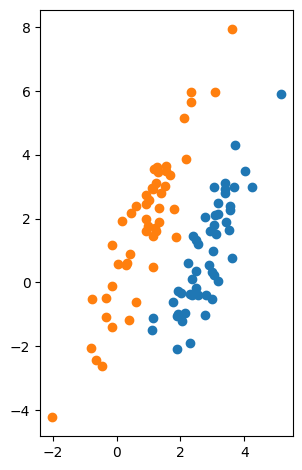

In [54]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import multivariate_normal

N=100
X = np.vstack( [
                multivariate_normal([3, 1], [[1, 2], [2, 5]], size=N//2),
                multivariate_normal([1, 2], [[1, 2], [2, 5]], size=N//2) # The µ is not the same as in the description
               ])
Y = np.hstack( [np.zeros(N//2), np.ones(N//2)])

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.scatter(X[:N//2, 0], X[:N//2, 1])
ax.scatter(X[N//2:, 0], X[N//2:, 1])
ax.set_aspect('equal', adjustable='box')
fig.tight_layout()
plt.show()

## (2) PCA

Apply PCA to the 2-d samples generated in (1) by assuming two distributions as a single sample set. Draw the 1st principal axis on the scatter plot in (1). (Do not use built-in / library function of PCA, such as `sklearn.decomposition.PCA`)

* Use `ax.set_aspect('equal', adjustable='box')` to equalize the x- and y-scales as done in the above.
* `print()` the calculated axis orientation (the slope).


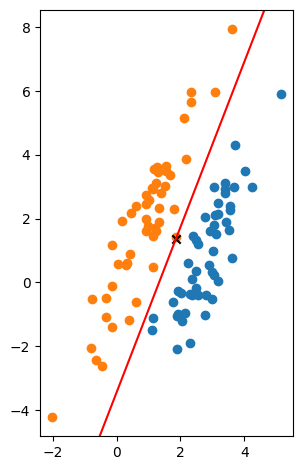

slope = 2.5879945778715663 (68.9 [deg])


In [55]:
from math import atan

# Center the data
XMean = np.mean(X, axis=0)
XCentered = X - XMean

# Compute covariance matrix
covMatrix = np.dot(XCentered.T, XCentered)

# Compute eigenvalues and eigenvectors and sort in descending order
eigenValues, eigenVectors = np.linalg.eig(covMatrix)
sortedIndices = eigenValues.argsort()[::-1]
eigenVectorsSorted = eigenVectors[:, sortedIndices]

# Get the first principal axis vector
princEigVector = eigenVectorsSorted[:, 0]

# Calculate slope of principal axis vector
princVecSlope = princEigVector[1] / princEigVector[0]


# Plotting
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.scatter(X[:N//2, 0], X[:N//2, 1])
ax.scatter(X[N//2:, 0], X[N//2:, 1])

# Plot projection line and mean
ax.axline(XMean, slope=princVecSlope, color='red')
ax.scatter(XMean[0], XMean[1], marker='x', color='black')

ax.set_aspect('equal', adjustable='box')
fig.tight_layout()
plt.show()

# Print slope of projection line
angleInDegrees = atan(princVecSlope) * 180 / np.pi
print(f"slope = {princVecSlope} ({angleInDegrees:.1f} [deg])")

To double-check the optimality of the axis given by PCA, plot the variance $\tilde{\sigma}^2$ at each axis orientation $\theta = [-\pi/2:\pi/2]$.  Also `print()` the value of $\theta$ where $\tilde{\sigma}^2$ is maximized.

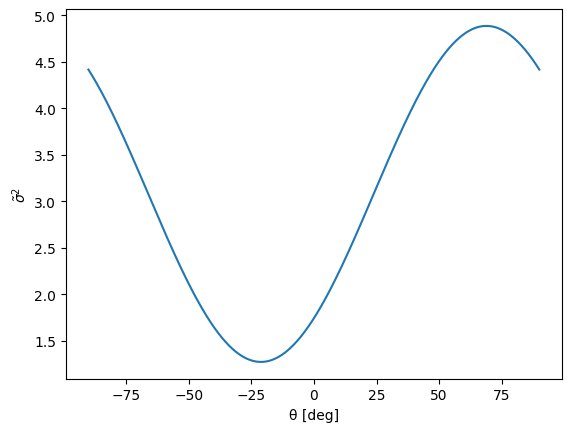

max variance = 4.885673501847487 at 68.9 [deg]


In [56]:
# Every 0.1 degrees
angles = 3600
theta = np.linspace(-np.pi/2, np.pi/2, 3600)

variances = []
for t in theta:
    tX = np.cos(t)
    tY = np.sin(t)
    projection = np.dot(XCentered, [tX, tY])
    variance = np.var(projection)
    variances.append(variance)
    
# Plot variances of angles
plt.plot(theta * 180 / np.pi, variances)
plt.xlabel("θ [deg]")
plt.ylabel(r"$\tilde{\sigma}^2$")
plt.show()

# Print max variance
varMaxIndex = np.argmax(variances)
print(f"max variance = {variances[varMaxIndex]} at {(theta[varMaxIndex]* 180 / np.pi):.1f} [deg]")

## (3) LDA

Apply Fisher LDA to the 2-d samples generated in (1) by assuming the two distributions are two different classes. Draw the calculated axis on the scatter plot. (Do not use built-in function of LDA, such as `sklearn.discriminant_analysis.LinearDiscriminantAnalysis`)

* Use `ax.set_aspect('equal', adjustable='box')` to equalize the x- and y-scales as done in the above.


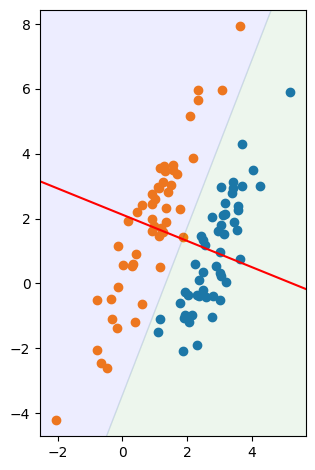

slope = -0.40523477077452774 (-22.1 [deg])


In [57]:
X1 = X[:N//2]
X2 = X[N//2:]
N1 = len(X1)
N2 = len(X2)

# Means for each class
mean1 = np.mean(X1, axis=0)
mean2 = np.mean(X2, axis=0)

# Centered data
XCentered1 = X1 - mean1
XCentered2 = X2 - mean2

# Covariance matrix for each class
covMatrix1 = np.dot(XCentered1.T, XCentered1)
covMatrix2 = np.dot(XCentered2.T, XCentered2)

# Within classs scatter
SW = covMatrix1 + covMatrix2

# Between class scatter
SB = ((N1 * N2) / (N1 + N2)) * np.dot((mean1 - mean2).reshape(-1,1), (mean1 - mean2).reshape(1,-1))

# Solve for projection vector
A = np.dot(np.linalg.inv(SW), (mean1 - mean2))

# Slope
projVecSlope = A[1] / A[0]



# Plotting
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.scatter(X[:N//2, 0], X[:N//2, 1])
ax.scatter(X[N//2:, 0], X[N//2:, 1])

# Projection line
overallMean = (N1 * mean1 + N2 * mean2) / len(X)
ax.axline(overallMean, slope=projVecSlope, color='red')

# Background color for classes
fillXPoints = [X[:, 0].min() - 1 , X[:, 0].max() + 1]
fillYPoints = XMean[1] + princVecSlope * (fillXPoints - XMean[0])
ax.fill_between(fillXPoints, fillYPoints, np.max(fillYPoints), color='blue', alpha=0.07)
ax.fill_between(fillXPoints, fillYPoints, np.min(fillYPoints), color='green', alpha=0.07)

# Adjust plot limits to center the points
ax.set_xlim(X[:,0].min() - 0.5, X[:,0].max() + 0.5)
ax.set_ylim(X[:,1].min() - 0.5, X[:,1].max() + 0.5)

ax.set_aspect('equal', adjustable='box')
fig.tight_layout()
plt.show()

# Print slope of projection line
angleInDegrees = atan(projVecSlope) * 180 / np.pi
print(f"slope = {projVecSlope} ({(angleInDegrees):.1f} [deg])")

To double-check the optimality of the axis given by LDA, plot $\tilde{S}_b / \tilde{S}_w$ at each axis orientation $\theta = [-\pi/2:\pi/2]$.  Also `print()` the value of $\theta$ where $\tilde{S}_b / \tilde{S}_w$ is maximized.  The max value must be equal to the largest eigenvalue (up to a numerical precision).

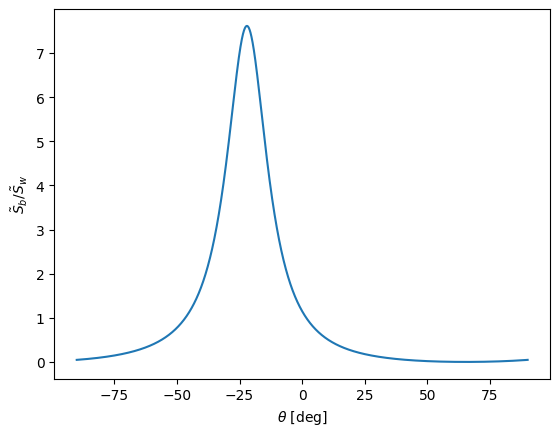

max Sb / Sw = 7.615228510392615 at -22.1 [deg])
largest eigenvalue = 7.61526


In [58]:
# Every 0.1 degrees
angles = 3600
theta = np.linspace(-np.pi/2, np.pi/2, 3600)

ratios = []
for t in theta:
    slope = np.array([np.cos(t), np.sin(t)])
    SBProj = (np.dot(slope.T,np.dot(SB,slope)))
    SWProj = (np.dot(slope.T,np.dot(SW,slope)))
    ratio = SBProj / SWProj
    ratios.append(ratio)


# Plot SBProj/SWProj
plt.figure()
plt.plot(theta * 180 / np.pi, ratios)
plt.xlabel(r'$\theta$ [deg]')
plt.ylabel(r'$\tilde{S}_b / \tilde{S}_w$')
plt.show()


# Print maximation
maxIndex = np.argmax(ratios)
optimalTheta = theta[maxIndex]
print(f"max Sb / Sw = {ratios[maxIndex]} at {(optimalTheta * 180 / np.pi):.1f} [deg])")

# Print largest eigenvalue
eigenValues, eigenVectoes = np.linalg.eig(np.linalg.inv(SW).dot(SB))
maxEigenValue = np.max(eigenValues)
print(f"largest eigenvalue = {maxEigenValue:.5f}")

## (4) Histograms

Show the 1-d histograms of the sample data transformed by the calculated axes in (2) and (3).
* You can use [`numpy.histogram()`](https://numpy.org/doc/stable/reference/generated/numpy.histogram.html) and/or [`matplotlib.pyplot.hist()`](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib-pyplot-hist).
* Show the two distributions (class $Y=0$ and class $Y=1$) in each of PCA and LDA histograms in different colors. You can use `histtype='step'` option to draw histograms by lines.

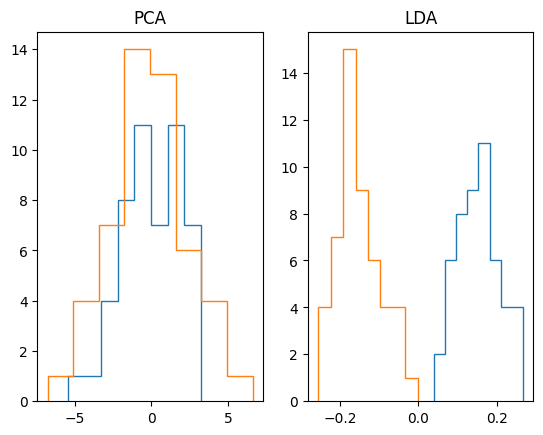

In [66]:
fig, ax = plt.subplots(nrows=1, ncols=2)

# PCA
ax[0].hist(np.dot(XCentered[:N//2], princEigVector), histtype='step', bins=8)
ax[0].hist(np.dot(XCentered[N//2:], princEigVector), histtype='step', bins=8)

# LDA
ax[1].hist(np.dot(XCentered[:N//2], A), histtype='step', bins=8)
ax[1].hist(np.dot(XCentered[N//2:], A), histtype='step', bins=8)

ax[0].set_title('PCA')
ax[1].set_title('LDA')
plt.show()

# (5) Discussions


### PCA (Principal Component Analysis)
   is an unsupervised method for dimensionality reduction. The purpuse is to find the principal components (directions) that can vary the data the most while reducing the dimensionality (projection). PCA finds the eigenvectors of the covariance matrix of the data, which indicate the variance by each principal component.
   
   **Mathematical Steps:**
   *  (Covariance matrix) $ \tilde{\sigma}^2 (A) = \frac{1}{n} \sum_{y \in Y} (y - \tilde{m})^T (y - \tilde{m}) = \text{tr} (A^T \Sigma A)$
   
   * Maximize for the variance of A (projection of points) (Eigenvalue decomposition):
   $$ \max \{ \tilde{\sigma}^2 (A) \} = \max \{ \text{tr}(A^T \Sigma A) \} $$
   $$ A = \arg\max_{\mathbf{A}} \{ \text{tr} (A^T \Sigma A) \} $$

   **Program Steps:**
   * Center the data around mean
   * Compute Covariance matrix
   * Compute largest eigenvalue and eigenvector (which is the direction of max variance)



   **Evalution**
    While the variance of the data is kept as high as possbile, the two classes get almost indistingishable from each other after the projection.
    
   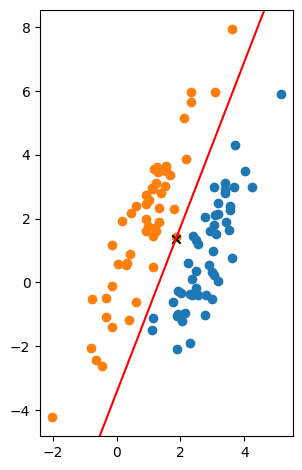



### LDA (Linear Discriminant Analysis)
   is a supervised method for dimensionality reduction and classification. The aim is to seperate the classes (of the data) as much as possible. This is done by maximazing the ratio of between-class variance to within-class variance.
   
   **Mathematical Steps:**

   * (within-class scatter) $ S_W = \sum_{i=1,2} \sum_{x \in X_i} (x - \mu_i)(x - \mu_i)^T$
   
   * (between-class scatter) $ S_B= \frac{n_1 \mu_1 + n_2 \mu_2}{n_1 + n_2}$

   * (maximize for ratio) $ \arg\max_{\mathbf{A}} \frac{\mathbf{A}^T S_B \mathbf{A}}{\mathbf{A}^T S_W \mathbf{A}} $


   **Program Steps:**
   * Center the class data points around each classes mean
   * Compute covariance matrix for each class
   * Compute within-class scatter
   * Compute between-class scatter
   * Solve for projection vector


   **Evalution**
   The main aim of this method is to retain the distinguishability between the classes as much as possible, which is fulfilled in this case.

   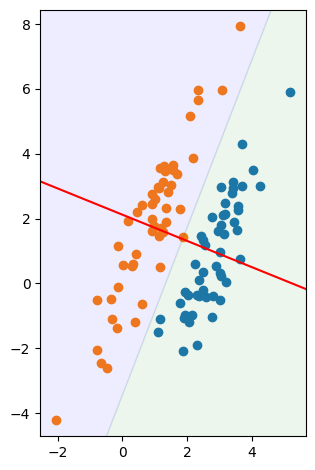



   ### Comparison
   When looking at the histogram for comparison, we can clearly see that LDA is the better way to keep classes seperated from each other. But if is more important keep high variance between the data points in general, PCA is doing a good job.

   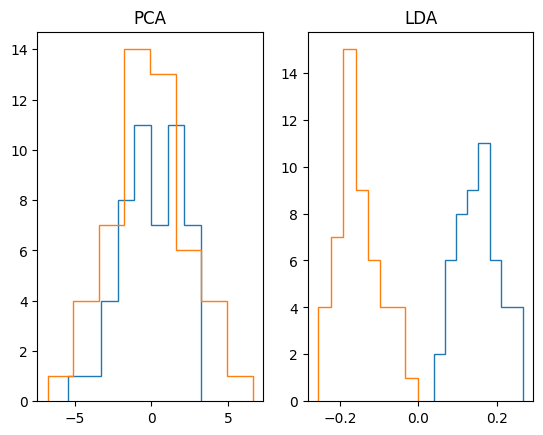

# Submit your ipynb

1. Click [Runtime]->[Restart and run all] to make sure that the notebook can run successfully from scratch.
2. Download the notebook as `ipynb` by [File]->[Download] menu.
3. Upload the downloaded `ipynb` to PandA.

